[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Joel\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Joel\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Joel\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Joel\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Joel\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


Sentence Tokenization: ['Transformer is an exceptional innovation in the field of Deep Learning, contributed by Ashish\nVaswani et al.', '(2017), Google.', 'The transformer is the most influential Neural Network model that has\nshown outstanding performance on various NLP tasks including Machine Reading Comprehension,\nMachine translation and sentence classification.', 'Attention mechanism and parallelization are the\nprominent features in the transformers.', 'Consequently, it can facilitate long-range dependencies\nwithout any gradient vanishing or gradient explosion problems and it overcomes the drawbacks of\nthe existing methods such as RNN and LSTM.', 'The transformer is executed with an encoder-decoder\nmechanism and the original article of transformers # “Attention All You Need”.']

Word Tokenization: ['Transformer', 'is', 'an', 'exceptional', 'innovation', 'in', 'the', 'field', 'of', 'Deep', 'Learning', ',', 'contributed', 'by', 'Ashish', 'Vaswani', 'et', 'al', '.', '(', '2017',

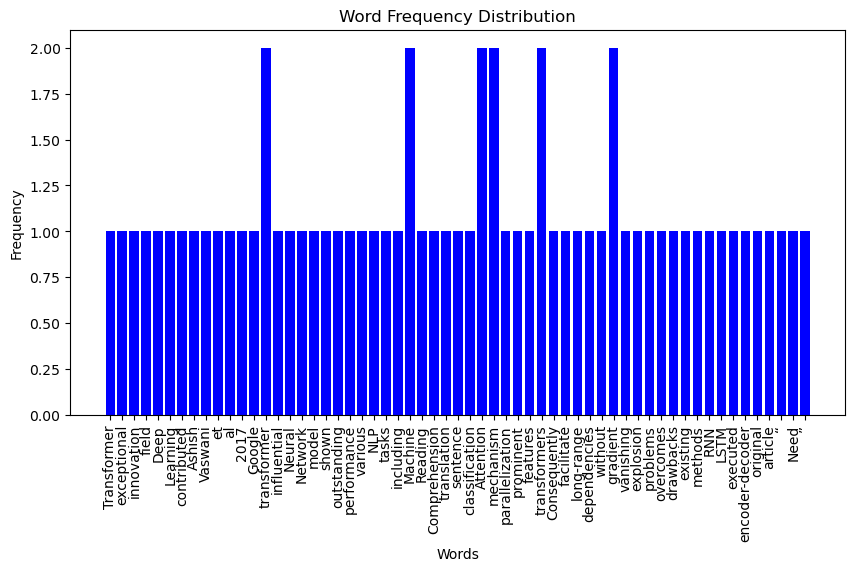

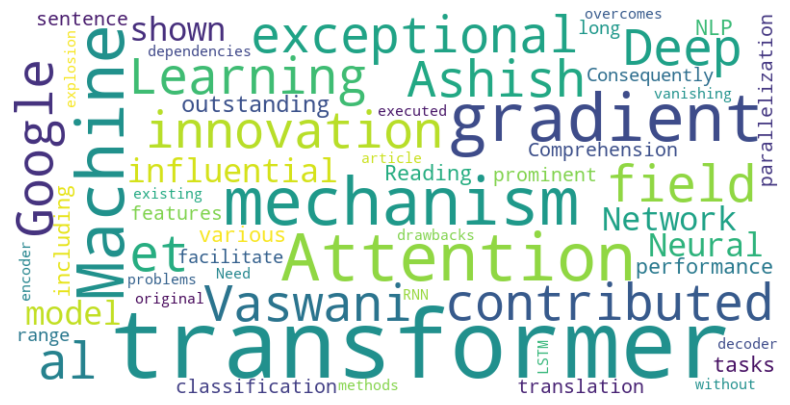


Porter Stemmer Output: ['transform', 'except', 'innov', 'field', 'deep', 'learn', 'contribut', 'ashish', 'vaswani', 'et', 'al', '2017', 'googl', 'transform', 'influenti', 'neural', 'network', 'model', 'shown', 'outstand', 'perform', 'variou', 'nlp', 'task', 'includ', 'machin', 'read', 'comprehens', 'machin', 'translat', 'sentenc', 'classif', 'attent', 'mechan', 'parallel', 'promin', 'featur', 'transform', 'consequ', 'facilit', 'long-rang', 'depend', 'without', 'gradient', 'vanish', 'gradient', 'explos', 'problem', 'overcom', 'drawback', 'exist', 'method', 'rnn', 'lstm', 'transform', 'execut', 'encoder-decod', 'mechan', 'origin', 'articl', 'transform', '“', 'attent', 'need', '”']

Lancaster Stemmer Output: ['transform', 'exceiv', 'innov', 'field', 'deep', 'learn', 'contribut', 'ash', 'vaswan', 'et', 'al', '2017', 'googl', 'transform', 'influ', 'neur', 'network', 'model', 'shown', 'outstand', 'perform', 'vary', 'nlp', 'task', 'includ', 'machin', 'read', 'comprehend', 'machin', 'transl',

In [1]:
import nltk
import spacy
import string
import matplotlib.pyplot as plt
from collections import Counter
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer
from nltk import pos_tag
from wordcloud import WordCloud

# Download necessary resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

# Load Spacy model for NER
nlp = spacy.load("en_core_web_sm")

# Input Text
text = """Transformer is an exceptional innovation in the field of Deep Learning, contributed by Ashish
Vaswani et al. (2017), Google. The transformer is the most influential Neural Network model that has
shown outstanding performance on various NLP tasks including Machine Reading Comprehension,
Machine translation and sentence classification. Attention mechanism and parallelization are the
prominent features in the transformers. Consequently, it can facilitate long-range dependencies
without any gradient vanishing or gradient explosion problems and it overcomes the drawbacks of
the existing methods such as RNN and LSTM. The transformer is executed with an encoder-decoder
mechanism and the original article of transformers # “Attention All You Need”."""

# Step a: Word and Sentence Tokenization
sentences = sent_tokenize(text)
words = word_tokenize(text)
print("Sentence Tokenization:", sentences)
print("\nWord Tokenization:", words)

# Step b: Stopwords Removal
stop_words = set(stopwords.words('english'))
words_filtered = [word for word in words if word.lower() not in stop_words]

# Step c: Punctuation Removal
words_no_punct = [word for word in words_filtered if word not in string.punctuation]
print("\nAfter Stopwords and Punctuation Removal:", words_no_punct)

# Step d: Frequency Distribution and Visualization
word_freq = Counter(words_no_punct)
print("\nWord Frequency Distribution:", word_freq)

# Plotting word frequency
plt.figure(figsize=(10,5))
plt.bar(word_freq.keys(), word_freq.values(), color='blue')
plt.xticks(rotation=90)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution")
plt.show()

# Generating WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(words_no_punct))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Step e: Stemming and Lemmatization
porter = PorterStemmer()
lancaster = LancasterStemmer()
lemmatizer = WordNetLemmatizer()

stemmed_porter = [porter.stem(word) for word in words_no_punct]
stemmed_lancaster = [lancaster.stem(word) for word in words_no_punct]
lemmatized_words = [lemmatizer.lemmatize(word) for word in words_no_punct]

print("\nPorter Stemmer Output:", stemmed_porter)
print("\nLancaster Stemmer Output:", stemmed_lancaster)
print("\nLemmatization Output:", lemmatized_words)

# Step f: Part-of-Speech (PoS) Tagging
pos_tags = pos_tag(words_no_punct)
print("\nPoS Tagging:", pos_tags)

# Step g: Named Entity Recognition (NER)
doc = nlp(text)
print("\nNamed Entities:")
for ent in doc.ents:
    print(ent.text, " -> ", ent.label_)


In [1]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

# Define Sample Sentences
sentences = [
    "Transformers are the most important innovation in Deep Learning.",
    "The Transformer model by Vaswani et al. revolutionized NLP.",
    "Self-attention and parallelization make transformers efficient."
]

# Count Vectorizer with Default Parameters
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sentences)
print("\n🔹 Default Count Vectorizer:")
print(pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out()))

# Count Vectorizer with max_df = 1 (includes all words)
vectorizer_maxdf1 = CountVectorizer(max_df=1)
X_maxdf1 = vectorizer_maxdf1.fit_transform(sentences)
print("\n🔹 Count Vectorizer with max_df=1:")
print(pd.DataFrame(X_maxdf1.toarray(), columns=vectorizer_maxdf1.get_feature_names_out()))

# Count Vectorizer with max_df = 2 (words appearing in ≤ 2 documents)
vectorizer_maxdf2 = CountVectorizer(max_df=2)
X_maxdf2 = vectorizer_maxdf2.fit_transform(sentences)
print("\n🔹 Count Vectorizer with max_df=2:")
print(pd.DataFrame(X_maxdf2.toarray(), columns=vectorizer_maxdf2.get_feature_names_out()))

# Count Vectorizer with max_df = 0.75 (ignores words appearing in more than 75% of documents)
vectorizer_maxdf75 = CountVectorizer(max_df=0.75)
X_maxdf75 = vectorizer_maxdf75.fit_transform(sentences)
print("\n🔹 Count Vectorizer with max_df=0.75:")
print(pd.DataFrame(X_maxdf75.toarray(), columns=vectorizer_maxdf75.get_feature_names_out()))

# Count Vectorizer with min_df = 1 (includes words appearing in at least 1 document)
vectorizer_mindf1 = CountVectorizer(min_df=1)
X_mindf1 = vectorizer_mindf1.fit_transform(sentences)
print("\n🔹 Count Vectorizer with min_df=1:")
print(pd.DataFrame(X_mindf1.toarray(), columns=vectorizer_mindf1.get_feature_names_out()))

# Count Vectorizer with min_df = 2 (includes words appearing in at least 2 documents)
vectorizer_mindf2 = CountVectorizer(min_df=2)
X_mindf2 = vectorizer_mindf2.fit_transform(sentences)
print("\n🔹 Count Vectorizer with min_df=2:")
print(pd.DataFrame(X_mindf2.toarray(), columns=vectorizer_mindf2.get_feature_names_out()))

# Count Vectorizer with max_features = 3 (selects top 3 words by frequency)
vectorizer_maxfeatures = CountVectorizer(max_features=3)
X_maxfeatures = vectorizer_maxfeatures.fit_transform(sentences)
print("\n🔹 Count Vectorizer with max_features=3:")
print(pd.DataFrame(X_maxfeatures.toarray(), columns=vectorizer_maxfeatures.get_feature_names_out()))

# TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(sentences)
print("\n🔹 TF-IDF Vectorizer:")
print(pd.DataFrame(X_tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out()))



🔹 Default Count Vectorizer:
   al  and  are  attention  by  deep  efficient  et  important  in  ...  \
0   0    0    1          0   0     1          0   0          1   1  ...   
1   1    0    0          0   1     0          0   1          0   0  ...   
2   0    1    0          1   0     0          1   0          0   0  ...   

   model  most  nlp  parallelization  revolutionized  self  the  transformer  \
0      0     1    0                0               0     0    1            0   
1      1     0    1                0               1     0    1            1   
2      0     0    0                1               0     1    0            0   

   transformers  vaswani  
0             1        0  
1             0        1  
2             1        0  

[3 rows x 23 columns]

🔹 Count Vectorizer with max_df=1:
   al  and  are  attention  by  deep  efficient  et  important  in  ...  \
0   0    0    1          0   0     1          0   0          1   1  ...   
1   1    0    0          0   1   